# **Começaremos com um exemplo clássico de classificação utilizando o Dataset Iris de Fisher (1936) e Máquina de Vetor de Suporte (SVM):** 

Neste caderno aplicaremos a técnica de classificação através de um classificador SVM.

Materiais de Referência: https://minerandodados.com.br/spotify-svm-python/

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Aplicação conjunto Iris

Imagine que você é um botânico que procura uma maneira automatizada de categorizar cada flor de íris que encontrar. O aprendizado de máquina fornece muitos algoritmos para classificar flores estatisticamente. Por exemplo, um sofisticado programa de aprendizado de máquina pode classificar flores com base em fotografias. Nossas ambições são mais modestas - vamos classificar as flores de íris com base nas medidas de *comprimento e largura de suas sépalas e pétalas*.



> O conjunto de dados consiste de 150 amostras contendo 4 medidas de distancia entre as sépalas e pétalas conforme figura 2. As amostras correspondem a uma das 3 espécies (*Iris setosa*, *Iris virginica* e *Iris versicolor*) referente a figura 1

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

<table>
  <tr><td>
    <img src="https://miro.medium.com/max/1400/0*7H_gF1KnslexnJ3s"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 2. Estrutura do conjuto de dados</b> <a href="https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983">Image-Credit</a>
  </td></tr>
</table>




## Leitura do conjunto de dados

Para a importação do **dataset** utilizamos a biblioteca *Pandas* e do **método de treinamento** a *Scikit-Learn*.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

df = pd.read_csv('iris.csv',index_col=False) # Leitura do arquivo formato csv
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Descrição do conjunto de dados

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

df['Species'] = iris.target
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)     Species
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.0

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
Species               3
dtype: int64

## Preparação dos dados para treinamento

In [ ]:
treino = iris.data
treino

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
classes = iris.target
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
treino.shape

(150, 4)

Text(0.5, 1.0, 'Petal vs Classes')

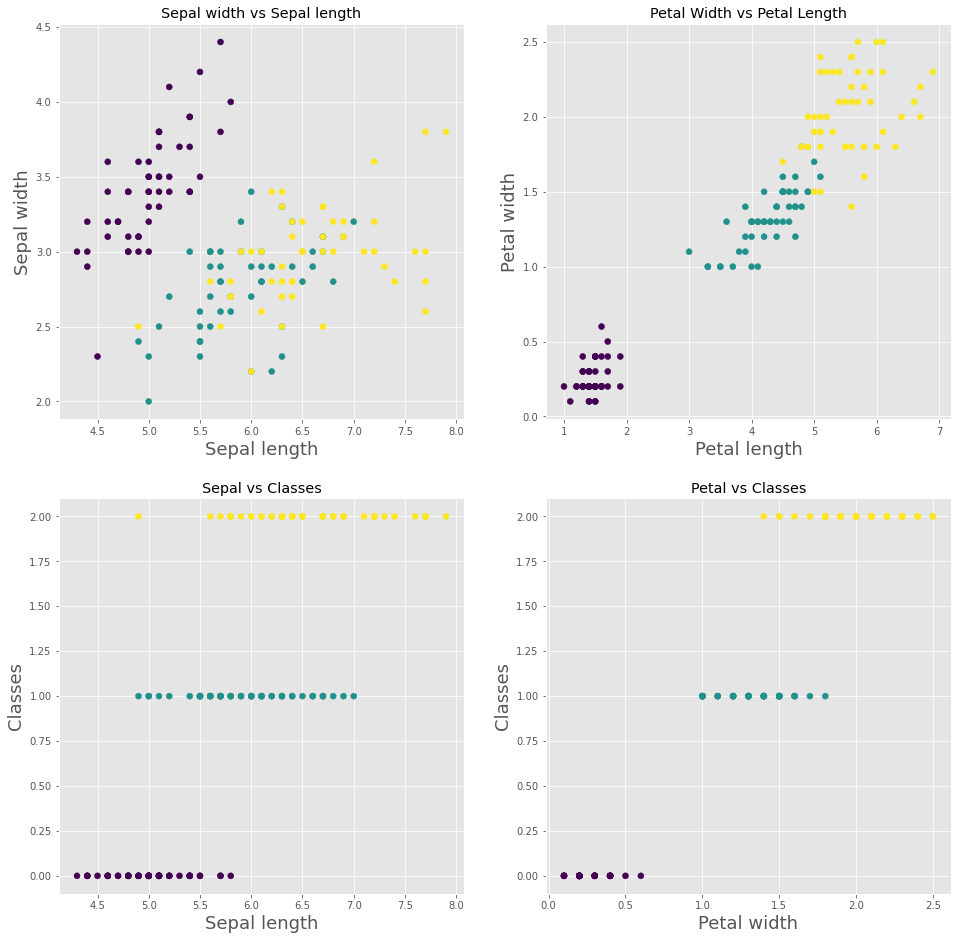

In [ ]:
%matplotlib inline
from matplotlib import style
style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize=(16,16))
#sepal length vs sepal width
axes[0,0].scatter(treino[:,0],treino[:,1], c=classes)
axes[0,0].set_xlabel('Sepal length', fontsize=18)
axes[0,0].set_ylabel('Sepal width', fontsize=18)
axes[0,0].set_title('Sepal width vs Sepal length')

#petal length vs petal width
axes[0,1].scatter(treino[:,2], treino[:,3], c=classes)
axes[0,1].set_xlabel('Petal length', fontsize=18)
axes[0,1].set_ylabel('Petal width', fontsize=18)
axes[0,1].set_title('Petal Width vs Petal Length')

#sepal length vs classes
axes[1,0].scatter(treino[:,0],classes, c=classes)
axes[1,0].set_xlabel('Sepal length', fontsize=18)
axes[1,0].set_ylabel('Classes', fontsize=18)
axes[1,0].set_title('Sepal vs Classes')

#Petal width vs classes
axes[1,1].scatter(treino[:,3],classes, c=classes)
axes[1,1].set_xlabel('Petal width', fontsize=18)
axes[1,1].set_ylabel('Classes', fontsize=18)
axes[1,1].set_title('Petal vs Classes')

Serão utilizadas 120 amostras para treinamento e 30 para testes.

In [ ]:
len(treino[:-30]), len(classes[:-30])

(120, 120)

## Treinamento do modelo

###1) Separação dados de treino utilizando apenas a classe 2 para testes

In [ ]:
clf1 = svm.SVC().fit(treino[:-30],classes[:-30])
clf1

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

> O que fizemos foi criar um objeto chamado **clf** . Esse objeto recebe o retorno do método *fit()* que é o treino do algoritmo SVM. Agora temos um SVM treinado com as 120 linhas da nossa base de dados. Para testar o classificador, vamos classificar as últimas 30 linhas dos dados (já que o algoritmo não conhece esses dados).


###2) Distribuindo aleatoriamente a quantidade de amostras para cada classe no conjunto de treino e teste


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_test

array([0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 1, 1, 2, 1, 2, 1])

In [ ]:
clf_split = svm.SVC().fit(x_train,y_train)
clf_split

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Validando o Classificador

 Uma forma de validar o classificador é usar a técnica chamada **Cross Validation**, que consiste em dividir o dado de treino e teste de forma que todo o dado é testado. Dessa forma, resolvemos o problema de variância nos dados.

Criaremos uma função que faz o **Cross Validation** e nos retorna a acurácia média. Assim, é só chamar a função na hora que precisarmos.

In [ ]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,resultados)

###1) Separação dados de treino utilizando apenas a classe 2 para testes


In [ ]:
Acuracia(clf1,treino[:-30],classes[:-30])

0.9583333333333334

###2) Distribuindo aleatoriamente a quantidade de amostras para cada classe no conjunto de treino e teste

In [ ]:
Acuracia(clf_split,x_train,y_train)

0.975

# Testando o Classificador

###1) Separação dados de treino utilizando apenas a classe 2 para testes


In [ ]:
print('Predição =', clf1.predict(treino[-30:]))
print('Classe Verdadeira =', classes[-30:])

from sklearn.metrics import accuracy_score

print('Acurácia =', accuracy_score(clf1.predict(treino[-30:]), classes[-30:]))

Predição = [2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]
Classe Verdadeira = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Acurácia = 0.7


###2) Distribuindo aleatoriamente a quantidade de amostras para cada classe no conjunto de treino e teste

In [ ]:
print('Predição =', clf_split.predict(x_test))
print('Classe Verdadeira =', y_test)

from sklearn.metrics import accuracy_score

print('Acurácia =', accuracy_score(clf_split.predict(x_test), y_test))

Predição = [0 0 1 1 2 1 0 0 2 2 1 1 1 2 2 2 2 2 1 2 1 0 0 2 2 1 2 1 2 1]
Classe Verdadeira = [0 0 2 1 2 1 0 0 1 1 1 1 1 2 2 2 2 2 1 2 1 0 0 2 1 1 2 1 2 1]
Acurácia = 0.8666666666666667


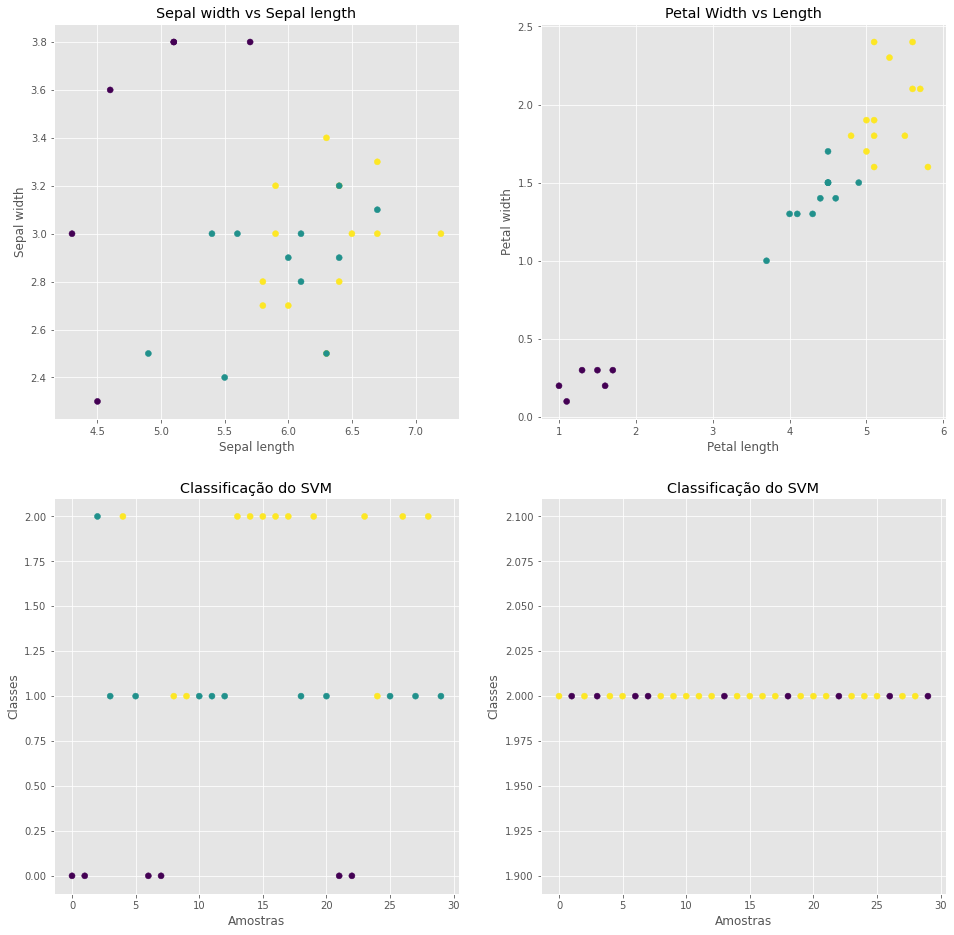

In [ ]:
%matplotlib inline
from matplotlib import style
style.use("ggplot")

fig, axes = plt.subplots(2, 2, figsize =(16,16))
#sepal length vs sepal width
axes[0,0].set_xlabel('Sepal length')
axes[0,0].set_ylabel('Sepal width')
axes[0,0].set_title('Sepal width vs Sepal length')
axes[0,0].scatter(x_test[:,0],x_test[:,1], c=clf_split.predict(x_test))
#axes[0,0].scatter(treino[-30:,0],treino[-30:,1], c=clf1.predict(treino[-30:]))

#petal length vs petal width
axes[0,1].set_xlabel('Petal length')
axes[0,1].set_ylabel('Petal width')
axes[0,1].set_title('Petal Width vs Length')
axes[0,1].scatter(x_test[:,2],x_test[:,3], c=clf_split.predict(x_test))
#axes[0,1].scatter(treino[-30:,2], treino[-30:,3], c=clf1.predict(treino[-30:]))

#Classificador
axes[1,0].set_xlabel('Amostras')
axes[1,0].set_ylabel('Classes')
axes[1,0].set_title('Classificação do SVM')
axes[1,0].scatter(range(len(y_test)),y_test, c=clf_split.predict(x_test))
#axes[1,0].scatter(range(len(classes[-30:])),classes[-30:],c=clf1.predict(treino[-30:]))

#Classificador
axes[1,1].set_xlabel('Amostras')
axes[1,1].set_ylabel('Classes')
axes[1,1].set_title('Classificação do SVM')
#axes[1,1].scatter(range(len(y_test)),y_test, c=clf_split.predict(x_test))
axes[1,1].scatter(range(len(classes[-30:])),classes[-30:],c=clf1.predict(treino[-30:]))